In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
path = '../image64/'

In [4]:
X_train = np.load(path + 'X_train.npy')
y_train = np.load(path + 'y_train.npy')

X_validate = np.load(path + 'X_validate.npy')
y_validate = np.load(path + 'y_validate.npy')

X_test = np.load(path + 'X_test.npy')
y_test = np.load(path + 'y_test.npy')

## Reshaping

In [5]:
X_train.shape

(7922, 64, 64, 1)

In [9]:
X_train = np.reshape(X_train, (7922, 64*64*1))

In [11]:
X_validate.shape

(2264, 64, 64, 1)

In [12]:
X_validate = np.reshape(X_validate, (2264, 64*64*1))

In [13]:
X_test.shape

(1132, 64, 64, 1)

In [14]:
X_test = np.reshape(X_test, (1132, 64*64*1))

## rescale all pixel by (1./255)

In [15]:
X_train = X_train * (1./255)
X_validate = X_validate * (1./255)
X_test = X_test * (1./255)

## Feature Selection

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
skb = SelectKBest(f_classif)
skb.fit(X_train, y_train)
pixel_number = list(range(64*64))

df_skb = pd.DataFrame({'pixel_number': pixel_number,
                      'score': skb.scores_.tolist()}).sort_values('score', ascending = False)

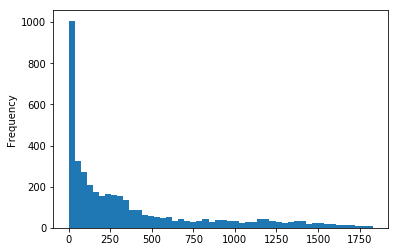

In [30]:
df_skb.score.plot(kind = 'hist', bins = 50)

In [31]:
df_skb.head()

,pixel_number,score
1336,1336,1830.027733
1158,1158,1814.436081
1094,1094,1813.303381
1273,1273,1810.632012
1400,1400,1807.782228


In [33]:
pixel_wanted = df_skb[df_skb.score >= 500]['pixel_number'].values.tolist()

## logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('train score', lr.score(X_train, y_train))
print('validation score', lr.score(X_validate, y_validate))
print('test score', lr.score(X_test, y_test))

train score 0.9075990911386014
validation score 0.8224381625441696
test score 0.8277385159010601


In [44]:
lr = LogisticRegression()
lr.fit(X_train[:, pixel_wanted], y_train)
print('train score', lr.score(X_train[:, pixel_wanted], y_train))
print('validation score', lr.score(X_validate[:, pixel_wanted], y_validate))
print('test score', lr.score(X_test[:, pixel_wanted], y_test))

train score 0.8574854834637717
validation score 0.8277385159010601
test score 0.8303886925795053


### SGD logistic regression

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
SGD = SGDClassifier()
SGD.fit(X_train,y_train)
print('train score', SGD.score(X_train, y_train))
print('validation score', SGD.score(X_validate, y_validate))
print('test score', SGD.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.8268114112597829
validation score 0.8153710247349824
test score 0.8171378091872792


In [48]:
SGD = SGDClassifier()
SGD.fit(X_train[:, pixel_wanted],y_train)
print('train score', SGD.score(X_train[:, pixel_wanted], y_train))
print('validation score', SGD.score(X_validate[:, pixel_wanted], y_validate))
print('test score', SGD.score(X_test[:, pixel_wanted], y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.7765715728351427
validation score 0.7654593639575972
test score 0.7685512367491166


## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('train score', rfc.score(X_train, y_train))
print('validation score', rfc.score(X_validate, y_validate))
print('test score', rfc.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


train score 0.9904064630143903
validation score 0.8507067137809188
test score 0.833922261484099


In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train[:, pixel_wanted], y_train)
print('train score', rfc.score(X_train[:, pixel_wanted], y_train))
print('validation score', rfc.score(X_validate[:, pixel_wanted], y_validate))
print('test score', rfc.score(X_test[:, pixel_wanted], y_test))

train score 0.9904064630143903
validation score 0.8392226148409894
test score 0.838339222614841


## CatBoost

In [68]:
from catboost import CatBoostClassifier, Pool, cv

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
catboost = CatBoostClassifier(custom_loss=['Accuracy'])

catboost.fit(X_train[:, pixel_wanted], y_train)

0:	learn: 0.6755625	total: 1.2s	remaining: 19m 56s
1:	learn: 0.6580514	total: 1.62s	remaining: 13m 28s
2:	learn: 0.6430811	total: 1.94s	remaining: 10m 45s
3:	learn: 0.6283415	total: 2.32s	remaining: 9m 38s
4:	learn: 0.6144651	total: 2.62s	remaining: 8m 41s
5:	learn: 0.6018135	total: 2.95s	remaining: 8m 8s
6:	learn: 0.5896032	total: 3.36s	remaining: 7m 56s
7:	learn: 0.5782305	total: 3.98s	remaining: 8m 13s
8:	learn: 0.5670476	total: 4.32s	remaining: 7m 56s
9:	learn: 0.5570990	total: 4.64s	remaining: 7m 39s
10:	learn: 0.5471220	total: 4.94s	remaining: 7m 24s
11:	learn: 0.5380049	total: 5.23s	remaining: 7m 10s
12:	learn: 0.5292976	total: 5.5s	remaining: 6m 57s
13:	learn: 0.5210375	total: 5.83s	remaining: 6m 50s
14:	learn: 0.5134950	total: 6.31s	remaining: 6m 54s
15:	learn: 0.5066165	total: 6.62s	remaining: 6m 47s
16:	learn: 0.5001746	total: 6.92s	remaining: 6m 40s
17:	learn: 0.4944124	total: 7.34s	remaining: 6m 40s
18:	learn: 0.4883188	total: 7.76s	remaining: 6m 40s
19:	learn: 0.4823545	t

158:	learn: 0.3119628	total: 53.2s	remaining: 4m 41s
159:	learn: 0.3114499	total: 53.5s	remaining: 4m 40s
160:	learn: 0.3110747	total: 53.8s	remaining: 4m 40s
161:	learn: 0.3109372	total: 54.1s	remaining: 4m 39s
162:	learn: 0.3106939	total: 54.4s	remaining: 4m 39s
163:	learn: 0.3102115	total: 54.8s	remaining: 4m 39s
164:	learn: 0.3098992	total: 55.1s	remaining: 4m 38s
165:	learn: 0.3095118	total: 55.4s	remaining: 4m 38s
166:	learn: 0.3091994	total: 55.7s	remaining: 4m 37s
167:	learn: 0.3089454	total: 56s	remaining: 4m 37s
168:	learn: 0.3085008	total: 56.4s	remaining: 4m 37s
169:	learn: 0.3081077	total: 56.7s	remaining: 4m 36s
170:	learn: 0.3075330	total: 57s	remaining: 4m 36s
171:	learn: 0.3071267	total: 57.3s	remaining: 4m 36s
172:	learn: 0.3068513	total: 57.7s	remaining: 4m 35s
173:	learn: 0.3066002	total: 58s	remaining: 4m 35s
174:	learn: 0.3062515	total: 58.3s	remaining: 4m 34s
175:	learn: 0.3059867	total: 58.6s	remaining: 4m 34s
176:	learn: 0.3058080	total: 58.9s	remaining: 4m 33s

312:	learn: 0.2717695	total: 1m 45s	remaining: 3m 52s
313:	learn: 0.2715625	total: 1m 46s	remaining: 3m 52s
314:	learn: 0.2714133	total: 1m 46s	remaining: 3m 51s
315:	learn: 0.2713262	total: 1m 46s	remaining: 3m 51s
316:	learn: 0.2712300	total: 1m 47s	remaining: 3m 50s
317:	learn: 0.2711430	total: 1m 47s	remaining: 3m 50s
318:	learn: 0.2709553	total: 1m 47s	remaining: 3m 50s
319:	learn: 0.2705067	total: 1m 48s	remaining: 3m 50s
320:	learn: 0.2703064	total: 1m 48s	remaining: 3m 50s
321:	learn: 0.2702009	total: 1m 49s	remaining: 3m 49s
322:	learn: 0.2699985	total: 1m 49s	remaining: 3m 49s
323:	learn: 0.2697862	total: 1m 49s	remaining: 3m 49s
324:	learn: 0.2696712	total: 1m 50s	remaining: 3m 48s
325:	learn: 0.2694437	total: 1m 50s	remaining: 3m 48s
326:	learn: 0.2692579	total: 1m 50s	remaining: 3m 48s
327:	learn: 0.2689557	total: 1m 51s	remaining: 3m 47s
328:	learn: 0.2685905	total: 1m 51s	remaining: 3m 47s
329:	learn: 0.2682483	total: 1m 51s	remaining: 3m 47s
330:	learn: 0.2680964	total:

466:	learn: 0.2421009	total: 2m 35s	remaining: 2m 57s
467:	learn: 0.2420000	total: 2m 35s	remaining: 2m 56s
468:	learn: 0.2416873	total: 2m 35s	remaining: 2m 56s
469:	learn: 0.2415432	total: 2m 36s	remaining: 2m 56s
470:	learn: 0.2412070	total: 2m 36s	remaining: 2m 55s
471:	learn: 0.2410815	total: 2m 36s	remaining: 2m 55s
472:	learn: 0.2410271	total: 2m 37s	remaining: 2m 55s
473:	learn: 0.2408230	total: 2m 37s	remaining: 2m 54s
474:	learn: 0.2405394	total: 2m 37s	remaining: 2m 54s
475:	learn: 0.2404944	total: 2m 38s	remaining: 2m 54s
476:	learn: 0.2403679	total: 2m 38s	remaining: 2m 53s
477:	learn: 0.2402883	total: 2m 38s	remaining: 2m 53s
478:	learn: 0.2400558	total: 2m 39s	remaining: 2m 52s
479:	learn: 0.2398026	total: 2m 39s	remaining: 2m 52s
480:	learn: 0.2396380	total: 2m 39s	remaining: 2m 52s
481:	learn: 0.2392549	total: 2m 39s	remaining: 2m 51s
482:	learn: 0.2390322	total: 2m 40s	remaining: 2m 51s
483:	learn: 0.2389134	total: 2m 40s	remaining: 2m 51s
484:	learn: 0.2385711	total:

619:	learn: 0.2215915	total: 3m 22s	remaining: 2m 4s
620:	learn: 0.2215342	total: 3m 22s	remaining: 2m 3s
621:	learn: 0.2215192	total: 3m 23s	remaining: 2m 3s
622:	learn: 0.2213695	total: 3m 23s	remaining: 2m 3s
623:	learn: 0.2212037	total: 3m 23s	remaining: 2m 2s
624:	learn: 0.2211264	total: 3m 24s	remaining: 2m 2s
625:	learn: 0.2210050	total: 3m 24s	remaining: 2m 2s
626:	learn: 0.2208262	total: 3m 24s	remaining: 2m 1s
627:	learn: 0.2208080	total: 3m 25s	remaining: 2m 1s
628:	learn: 0.2207526	total: 3m 25s	remaining: 2m 1s
629:	learn: 0.2206845	total: 3m 25s	remaining: 2m
630:	learn: 0.2205272	total: 3m 26s	remaining: 2m
631:	learn: 0.2203523	total: 3m 26s	remaining: 2m
632:	learn: 0.2201803	total: 3m 26s	remaining: 1m 59s
633:	learn: 0.2200593	total: 3m 27s	remaining: 1m 59s
634:	learn: 0.2199264	total: 3m 27s	remaining: 1m 59s
635:	learn: 0.2198403	total: 3m 27s	remaining: 1m 59s
636:	learn: 0.2198115	total: 3m 28s	remaining: 1m 58s
637:	learn: 0.2197311	total: 3m 28s	remaining: 1m 

772:	learn: 0.2059208	total: 4m 16s	remaining: 1m 15s
773:	learn: 0.2059197	total: 4m 16s	remaining: 1m 15s
774:	learn: 0.2058335	total: 4m 17s	remaining: 1m 14s
775:	learn: 0.2057343	total: 4m 17s	remaining: 1m 14s
776:	learn: 0.2056994	total: 4m 17s	remaining: 1m 14s
777:	learn: 0.2055535	total: 4m 18s	remaining: 1m 13s
778:	learn: 0.2054721	total: 4m 18s	remaining: 1m 13s
779:	learn: 0.2054310	total: 4m 19s	remaining: 1m 13s
780:	learn: 0.2052979	total: 4m 19s	remaining: 1m 12s
781:	learn: 0.2052608	total: 4m 19s	remaining: 1m 12s
782:	learn: 0.2052440	total: 4m 20s	remaining: 1m 12s
783:	learn: 0.2052300	total: 4m 20s	remaining: 1m 11s
784:	learn: 0.2051565	total: 4m 20s	remaining: 1m 11s
785:	learn: 0.2051010	total: 4m 21s	remaining: 1m 11s
786:	learn: 0.2050100	total: 4m 21s	remaining: 1m 10s
787:	learn: 0.2049777	total: 4m 21s	remaining: 1m 10s
788:	learn: 0.2049043	total: 4m 21s	remaining: 1m 10s
789:	learn: 0.2048887	total: 4m 22s	remaining: 1m 9s
790:	learn: 0.2048662	total: 

929:	learn: 0.1932496	total: 5m 9s	remaining: 23.3s
930:	learn: 0.1932163	total: 5m 9s	remaining: 23s
931:	learn: 0.1931167	total: 5m 10s	remaining: 22.6s
932:	learn: 0.1930686	total: 5m 10s	remaining: 22.3s
933:	learn: 0.1930573	total: 5m 11s	remaining: 22s
934:	learn: 0.1928480	total: 5m 11s	remaining: 21.7s
935:	learn: 0.1926223	total: 5m 11s	remaining: 21.3s
936:	learn: 0.1925764	total: 5m 12s	remaining: 21s
937:	learn: 0.1924761	total: 5m 12s	remaining: 20.6s
938:	learn: 0.1924455	total: 5m 12s	remaining: 20.3s
939:	learn: 0.1924198	total: 5m 13s	remaining: 20s
940:	learn: 0.1923277	total: 5m 13s	remaining: 19.6s
941:	learn: 0.1923079	total: 5m 13s	remaining: 19.3s
942:	learn: 0.1921571	total: 5m 14s	remaining: 19s
943:	learn: 0.1921460	total: 5m 14s	remaining: 18.7s
944:	learn: 0.1920611	total: 5m 14s	remaining: 18.3s
945:	learn: 0.1919310	total: 5m 15s	remaining: 18s
946:	learn: 0.1918279	total: 5m 15s	remaining: 17.7s
947:	learn: 0.1917875	total: 5m 15s	remaining: 17.3s
948:	le

In [71]:
print('train score', catboost.score(X_train[:, pixel_wanted], y_train))
print('validation score', catboost.score(X_validate[:, pixel_wanted], y_validate))
print('test score', catboost.score(X_test[:, pixel_wanted], y_test))

train score 0.9385256248422116
validation score 0.8674911660777385
test score 0.8604240282685512


In [72]:
test_proba = catboost.predict_proba(X_test[:, pixel_wanted])

In [73]:
test_proba

array([[0.97937464, 0.02062536],
       [0.26586611, 0.73413389],
       [0.93297409, 0.06702591],
       ...,
       [0.96922283, 0.03077717],
       [0.06993987, 0.93006013],
       [0.92569022, 0.07430978]])

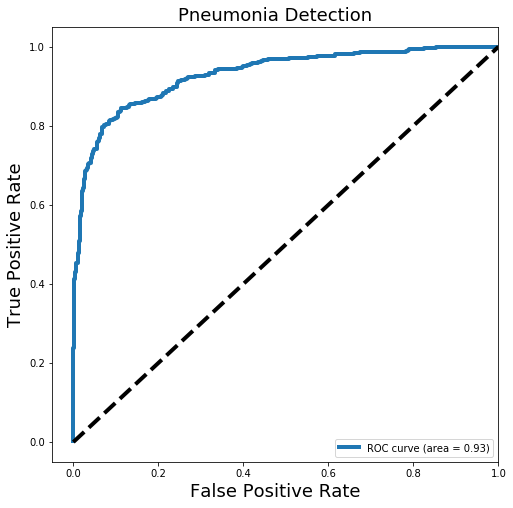

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Pneumonia Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()